# Implementation: Swarm Sampling

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from parallel_tempering import energy, f

In [121]:
# set parameters for target/proposal distribution
mu0 = 1
mu1 = 10

target_sigma0 = 1
target_sigma1 = 2


# target distribution: normal case
# f = lambda x: norm(mu0, target_sigma0).pdf(x)


# target distribution: bimodal case
f = lambda x: 0.5*norm(mu0, target_sigma0).pdf(x) + 0.5*norm(mu1, target_sigma1).pdf(x)

In [122]:
# mu0, mu1, mu2, mu3 = -10,0,10,30
# sig0, sig1, sig2, sig3 = 1, 2, 2, 1


# # # target distribution: difficult normal case
# f = lambda x: 0.25*norm(mu0, sig0).pdf(x) + 0.25*norm(mu1, sig1).pdf(x) + 0.25*norm(mu2, sig2).pdf(x) + 0.25*norm(mu3, sig3).pdf(x)


#### Running the code for a given number of chains and epochs

In [123]:
num_chains = 6
num_epochs = 10000

In [127]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_respawn.py {num_epochs}

acceptance for temp=4.3: 84.61%, received: 0.00%, respawned: 2.02%
acceptance for temp=1.3: 74.16%, received: 68.84%, respawned: 4.04%
acceptance for temp=3.3: 82.75%, received: 0.00%, respawned: 2.02%
acceptance for temp=2.3: 80.53%, received: 72.36%, respawned: 4.04%
acceptance for temp=1: 99.95%, received: 3.52%, respawned: 0.00%
Total time elapsed: 19.83 sec
acceptance for temp=5.3: 86.02%, received: 0.00%, respawned: 2.02%


In [110]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

acceptance for temp=1.5: 96.77%, exchange: 100.00%
acceptance for temp=4.5: 98.54%, exchange: 100.00%
acceptance for temp=3.0: 98.38%, exchange: 94.74%
acceptance for temp=6.0: 98.96%, exchange: 100.00%
acceptance for temp=1: 95.94%, exchange: 100.00%
Total time: 45.103809118270874
acceptance for temp=7.5: 99.38%, exchange: 0.00%


#### Loading in the results

In [125]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 10000, 2)


#### Plotting the results

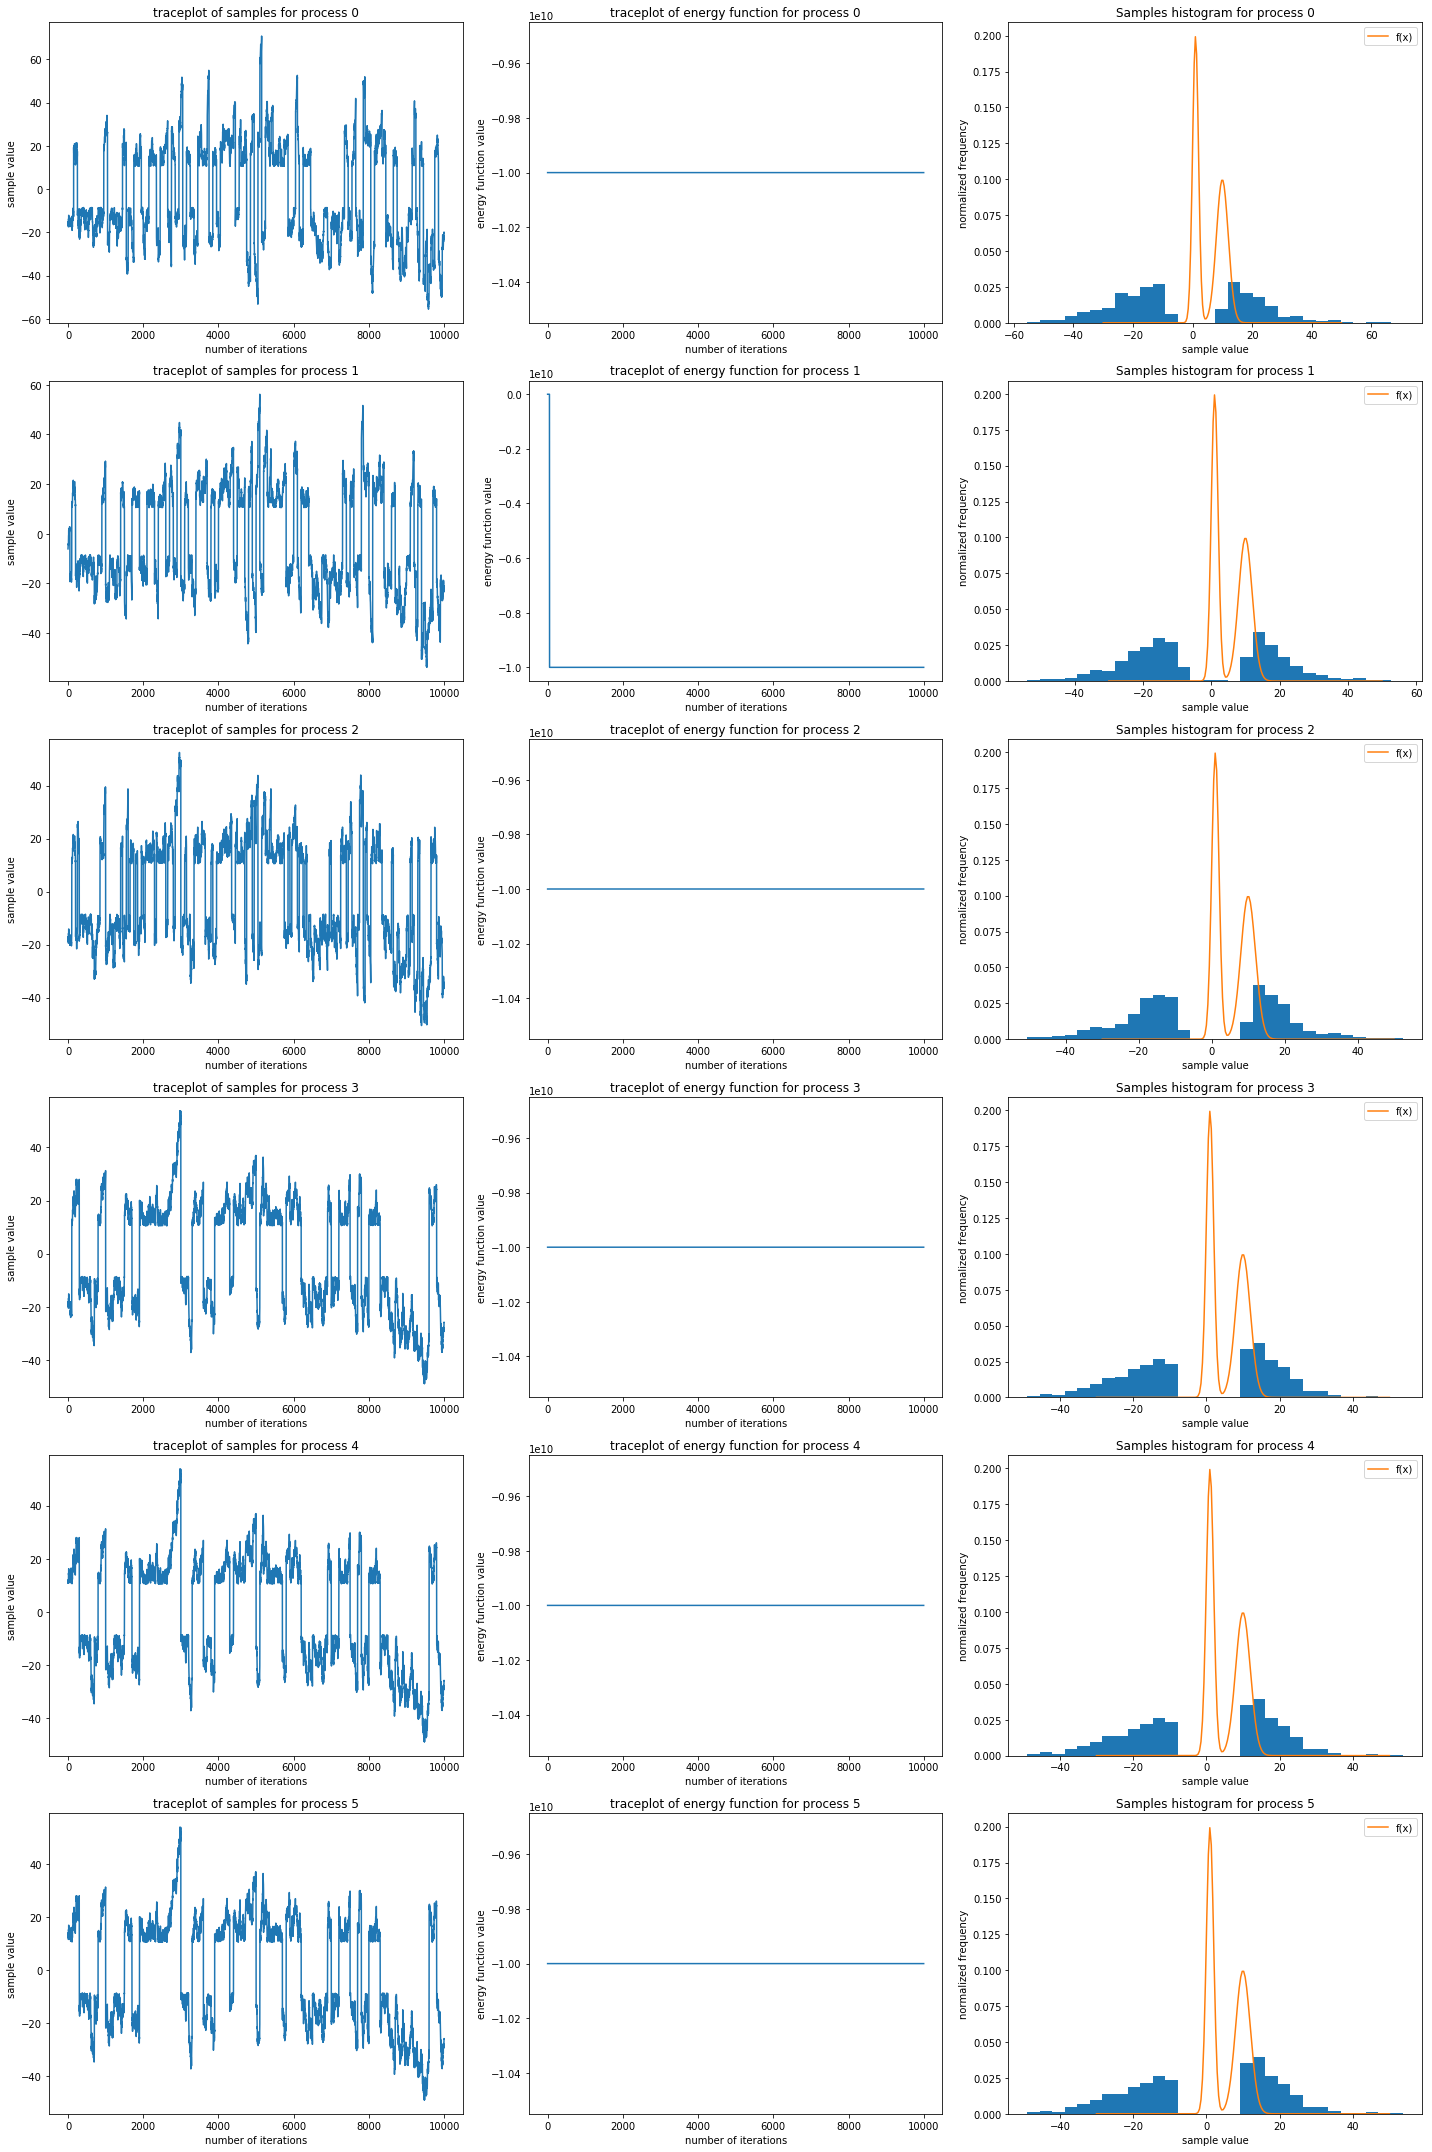

In [128]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

---

In [60]:
all_results.shape

(6, 1000, 2)

In [61]:
all_r = all_results.reshape(-1,2)

In [62]:
all_r.shape

(6000, 2)

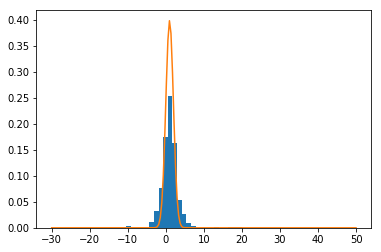

In [63]:

# collective intelligence: summing up samples
plt.hist(all_r[:,0],density=True, bins=30)
plt.plot(xgrid, f(xgrid), label='f(x)')
plt.show()

In [19]:
## ultimate selection strategy:

# find the best agent's performance (but will be difficult for high dimensions)

# sum up all the agent's performances 

In [36]:

mu0, mu1, mu2, mu3 = -10,0,10,30
sig0, sig1, sig2, sig3 = 1, 2, 2, 1

proposal_sigma = 1

# target distribution: normal case
f = lambda x: 0.25*norm(mu0, sig0).pdf(x) + 0.25*norm(mu1, sig1).pdf(x) + 0.25*norm(mu2, sig2).pdf(x) + 0.25*norm(mu3, sig3).pdf(x)


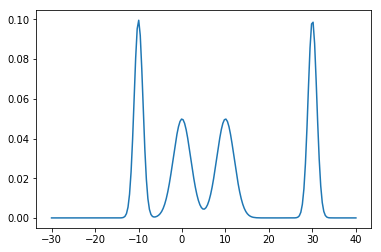

In [37]:
xgrid = np.linspace(-30,40,200)
plt.plot(xgrid, f(xgrid), label='f(x)')
plt.show()